<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise3_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4. Based on 1000 brain regions of interest (see ‘n_rois’) and using the first 80% of
the 100 structural brain scans, use
(sklearn.feature_selection.SelectKBest) and
(sklearn.feature_selection.f_classif) to perform principal component
analysis with the best k=2,4, 6, 8, 10 features. Then, use
sklearn.linear_model.LogisticRegression(hyperparameter set to 1.0) to
fit separate logistic regression models to predict sex differences. So, the input
features for fitting the LogReg are only the k best single features, as identified on the
training data. Next, evaluate each fitted LogReg model on the unseen final 20% of
the 100 structural brain scans and retrieve classification accuracy in XX.YY%.
Please plot the classification accuracy on the test set (x axis=the different numbers
of k best features, y axis=prediction accuracy on test set).

In [ ]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 7.1 MB/s 


In [ ]:
import numpy as np 
from nilearn import datasets 
from nilearn.maskers import NiftiLabelsMasker 
from nilearn.image import index_img 
import nibabel as nib

In [ ]:
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000) 
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache') 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=np.int) #gives 1 for females and 0 for males


Dataset created in /root/nilearn_data/oasis1



Downloaded 888586240 of 905208634 bytes (98.2%,    0.5s remaining) ...done. (28 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)



Dataset created in /root/nilearn_data/schaefer_2018



 ...done. (0 seconds, 0 min)


 ...done. (0 seconds, 0 min)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# Let's make sure we have a 100x1000 dataset
print (input_variables.shape)

(100, 1000)


In [ ]:
# Checking the output variable
output_variable

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
# First we will do a test-run with just 4 k-means clusters
brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(1000))  # We fix the ROIs at 1000
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache') 
input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=np.int)

X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8, test_size=0.2, shuffle=False)
k = SelectKBest(f_classif, k=4)
X_kmeans = k.fit_transform(X_scaled,y)

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
# We verify that we have 4 clusters
X_kmeans.shape

(100, 4)

In [ ]:
# We fit the k-clusters to a LogReg model
X_train_kBest, X_test_kBest, y_train, y_test = train_test_split(X_kmeans, y, train_size = 0.8, test_size=0.20, 
                                                            shuffle=False)

training_acc = []
test_acc = []

LR_kBestmeans = LogisticRegression(max_iter=1e4).fit(X_train_kBest, y_train) # We fit the LR model
score = LR_kBestmeans.score(X_train_kBest, y_train) # We will also export the score (...)
score = np.multiply(score, 100) 
training_acc.append(score)
print('Training accuracy: %.2f' % ((score))) # (...) and we will print it

yhat = LR_kBestmeans.predict(X_test_kBest) # We define the model and store its prediction as "yhat"
scores = LR_kBestmeans.score(X_test_kBest, y_test) # We store the scores
scores = np.multiply(scores, 100) 
test_acc.append(scores)
print('Test accuracy: %.2f' % ((scores))) # We print the scores

Training accuracy: 82.50
Test accuracy: 90.00


Wow, that's a pretty high classification accuracy, especially for the test set. Let's see if we can get an even better k best features solution.

In [ ]:
# Pre-allocating the array where we will store the output variables 
kfolds = (list(range(2,12,2)))
training_acc = []
test_acc = []

In [ ]:
for i in kfolds:
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(1000))  # We fix the ROIs at 1000
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache') 
    input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=np.int)

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8, test_size=0.2, shuffle=False)
    k = SelectKBest(f_classif, k=(i))
    X_kmeans = k.fit_transform(X_scaled,y)
    

    # We fit the k-clusters to a LogReg model
    X_train_kBest, X_test_kBest, y_train, y_test = train_test_split(X_kmeans, y, train_size = 0.8, test_size=0.20, 
                                                            shuffle=False)
    
    print('Number of clusters = ',i)

    LR_kBestmeans = LogisticRegression(max_iter=1e4).fit(X_train_kBest, y_train) # We fit the LR model
    score = LR_kBestmeans.score(X_train_kBest, y_train) # We will also export the score (...)
    score = np.multiply(score, 100) 
    training_acc.append(score)
    print('Training accuracy: %.2f' % ((score))) # (...) and we will print it

    yhat = LR_kBestmeans.predict(X_test_kBest) # We define the model and store its prediction as "yhat"
    scores = LR_kBestmeans.score(X_test_kBest, y_test) # We store the scores
    scores = np.multiply(scores, 100) 
    test_acc.append(scores)
    print('Test accuracy: %.2f' % ((scores))) # We print the scores

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pand

Number of clusters =  2
Training accuracy: 82.50
Test accuracy: 80.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Number of clusters =  4
Training accuracy: 82.50
Test accuracy: 90.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Number of clusters =  6
Training accuracy: 82.50
Test accuracy: 85.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


Number of clusters =  8
Training accuracy: 83.75
Test accuracy: 85.00
Number of clusters =  10
Training accuracy: 83.75
Test accuracy: 75.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


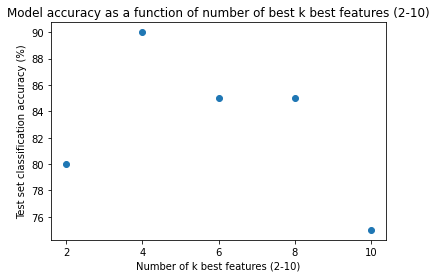

In [ ]:
plt.scatter(kfolds,test_acc)
plt.gca().set(
    title="Model accuracy as a function of number of best k best features (2-10)",
    xlabel="Number of k best features (2-10)",
    ylabel="Test set classification accuracy (%)",
    xticks = (kfolds)
)
plt.show()

Looks like selecting the 4 k best features is in fact the optimal solution, yielding an impressive 90% test set classification accuracy. The highest yet!